In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import chart_studio
import chart_studio.plotly as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import scipy.stats as stats
import os
import chart_studio.tools

In [67]:
chart_studio.tools.set_credentials_file(username='bikerdouglas', api_key='rGRSQ7yA1eqDryDgGEEl')

In [68]:
world = pd.read_csv('/Users/michaelphillipacosta/dai/projects/religion_crimes_2/data/world_data.csv')

In [69]:
rel_restricts = pd.read_stata('/Users/michaelphillipacosta/dai/projects/Religious-Restrictions-and-Crime-Rates/data/relig_restrict_2007to2016.dta')

In [70]:
countryScope = {
    "AUT": ["Austria"],
    "ALB": ["Albania"],
    "AND": ["Andorra"],
    "AFG": ["Afghanistan"],
    "AGO": ["Angola"],
    "AZE": ["Azerbaijan"],
    "ARG": ["Argentina"],
    "DZA": ["Algeria"],
    "ATG": ["Antigua and Barbuda"],
    "BHS": ["Bahamas"],
    "BRB": ["Barbados"],
    "ARM": ["Armenia"],
    "BLZ": ["Belize"],
    "BHR": ["Bahrain"],
    "BEL": ["Belgium"],
    "AUS": ["Australia"],
    "BEN": ["Benin"],
    "BRN": ["Brunei"],
    "BWA": ["Botswana"],
    "BGD": ["Bangladesh"],
    "BTN": ["Bhutan"],
    "BGR": ["Bulgaria"],
    "KHM": ["Cambodia"],
    "BLR": ["Belarus"],
    "BOL": ["Bolivia"],
    "BFA": ["Burkina Faso"],
    "CAN": ["Canada"],
    "BIH": ["Bosnia-Herzegovina", "Bosnia and Herzegovina"],
    "CAF": ["Central African Republic"],
    "BDI": ["Burundi"],
    "CHN": ["China", "PRC China"],
    "BRA": ["Brazil"],
    "TCD": ["Chad"],
    "COG": ["Republic of the Congo", "Congo"],
    "COM": ["Comoros"],
    "CMR": ["Cameroon"],
    "DNK": ["Denmark"],
    "COD": ["Democratic Republic of the Congo"],
    "CUB": ["Cuba"],
    "CPV": ["Cape Verde"],
    "DJI": ["Djibouti"],
    "CRI": ["Costa Rica"],
    "CZE": ["Czech Republic", "Czechia"],
    "CHL": ["Chile"],
    "DMA": ["Dominica"],
    "CIV": ["Ivory Coast"],
    "ECU": ["Ecuador"],
    "COL": ["Colombia", "Colombia (Medellin)"],
    "DOM": ["Dominican Republic"],
    "ERI": ["Eritrea"],
    "SLV": ["El Salvador"],
    "HRV": ["Croatia"],
    "GAB": ["Gabon"],
    "EST": ["Estonia"],
    "FJI": ["Fiji"],
    "CYP": ["Cyprus"],
    "GMB": ["Gambia"],
    "ETH": ["Ethiopia"],
    "FRA": ["France"],
    "EGY": ["Egypt"],
    "GEO": ["Georgia"],
    "GRD": ["Grenada"],
    "GHA": ["Ghana"],
    "GNQ": ["Equatorial Guinea"],
    "HTI": ["Haiti"],
    "IRQ": ["Iraq"],
    "GRC": ["Greece"],
    "FIN": ["Finland"],
    "HND": ["Honduras"],
    "IRL": ["Ireland"],
    "GTM": ["Guatemala"],
    "DEU": ["Germany", "German Federal Republic"],
    "HKG": ["Hong Kong"],
    "ISR": ["Israel"],
    "GNB": ["Guinea-Bissau"],
    "GIN": ["Guinea"],
    "KAZ": ["Kazakhstan"],
    "LBN": ["Lebanon"],
    "ISL": ["Iceland"],
    "GUY": ["Guyana"],
    "KEN": ["Kenya"],
    "LSO": ["Lesotho"],
    "IDN": ["Indonesia"],
    "HUN": ["Hungary"],
    "KIR": ["Kiribati"],
    "LBR": ["Liberia"],
    "JAM": ["Jamaica"],
    "IND": ["India"],
    "KSV": ["Kosovo"],
    "LBY": ["Libya"],
    "JOR": ["Jordan"],
    "IRN": ["Iran"],
    "MDG": ["Madagascar"],
    "MRT": ["Mauritania"],
    "KWT": ["Kuwait"],
    "ITA": ["Italy"],
    "MWI": ["Malawi"],
    "MUS": ["Mauritius"],
    "LAO": ["Laos"],
    "JPN": ["Japan"],
    "MYS": ["Malaysia"],
    "MEX": ["Mexico"],
    "LTU": ["Lithuania"],
    "KGZ": ["Kyrgyzstan"],
    "LVA": ["Latvia"],
    "LIE": ["Liechtenstein"],
    "LUX": ["Luxembourg"],
    "MKD": ["Republic of Macedonia", "North Macedonia"],
    "MLI": ["Mali"],
    "MHL": ["Marshall Islands"],
    "MDA": ["Moldova"],
    "MNG": ["Mongolia"],
    "NRU": ["Nauru"],
    "NLD": ["Netherlands", "The Netherlands"],
    "NER": ["Niger"],
    "PSE": ["Palestinian territories", "Palestine"],
    "PNG": ["Papua New Guinea"],
    "KNA": ["St. Kitts and Nevis"],
    "SRB": ["Serbia"],
    "SLE": ["Sierra Leone"],
    "KOR": ["South Korea"],
    "LKA": ["Sri Lanka"],
    "CHE": ["Switzerland"],
    "TWN": ["Taiwan"],
    "TON": ["Tonga"],
    "TUN": ["Tunisia"],
    "ARE": ["United Arab Emirates"],
    "USA": ["United States", "The USA", "USA", "United States of America"],
    "VEN": ["Venezuela"],
    "SSD": ["South Sudan"],
    "MAC": ["Macau", "Macao"],
    "MLT": ["Malta"],
    "FSM": ["Federated States of Micronesia", "Micronesia"],
    "MCO": ["Monaco"],
    "NAM": ["Namibia"],
    "NPL": ["Nepal"],
    "NGA": ["Nigeria"],
    "PLW": ["Palau"],
    "PAN": ["Panama"],
    "PRT": ["Portugal"],
    "QAT": ["Qatar"],
    "LCA": ["St. Lucia"],
    "VCT": ["St. Vincent and the Grenadines"],
    "SEN": ["Senegal"],
    "SYC": ["Seychelles"],
    "SGP": ["Singapore"],
    "ZAF": ["South Africa"],
    "ESP": ["Spain", "Spain (Murcia)"],
    "SYR": ["Syria"],
    "TJK": ["Tajikistan"],
    "TTO": ["Trinidad and Tobago"],
    "TUR": ["Turkey"],
    "UKR": ["Ukraine"],
    "GBR": ["United Kingdom", "Northern Ireland"],
    "VNM": ["Vietnam"],
    "ESH": ["Western Sahara"],
    "MDV": ["Maldives"],
    "MNE": ["Montenegro"],
    "MAR": ["Morocco"],
    "MOZ": ["Mozambique"],
    "MMR": ["Burma (Myanmar)", "Myanmar"],
    "NOR": ["Norway"],
    "OMN": ["Oman"],
    "PAK": ["Pakistan"],
    "ROU": ["Romania"],
    "RUS": ["Russia"],
    "RWA": ["Rwanda"],
    "SVK": ["Slovakia"],
    "SVN": ["Slovenia"],
    "SLB": ["Solomon Islands"],
    "SOM": ["Somalia"],
    "TZA": ["Tanzania"],
    "THA": ["Thailand"],
    "TLS": ["Timor-Leste"],
    "TGO": ["Togo"],
    "URY": ["Uruguay"],
    "UZB": ["Uzbekistan"],
    "VUT": ["Vanuatu"],
    "NZL": ["New Zealand"],
    "NIC": ["Nicaragua"],
    "PRY": ["Paraguay"],
    "PER": ["Peru"],
    "PHL": ["Philippines"],
    "POL": ["Poland"],
    "WSM": ["Samoa"],
    "SMR": ["San Marino"],
    "STP": ["Sao Tome and Principe"],
    "SAU": ["Saudi Arabia"],
    "SDN": ["Sudan"],
    "SUR": ["Suriname"],
    "SWZ": ["Swaziland"],
    "SWE": ["Sweden"],
    "TKM": ["Turkmenistan"],
    "TUV": ["Tuvalu"],
    "UGA": ["Uganda"],
    "YEM": ["Yemen"],
    "ZMB": ["Zambia"],
    "ZWE": ["Zimbabwe"]
    }

def standardizeCountryNames(df, country_col, country_scope):
    standardized_countries = {}
    for iso_code, names in country_scope.items():
        for name in names:
            standardized_countries[name.lower()] = iso_code
    df[country_col] = df[country_col].str.lower().map(standardized_countries).fillna(df[country_col])
    return df

# Standardize country names in both datasets
df2 = standardizeCountryNames(rel_restricts, 'Ctry_EditorialName', countryScope)
df1 = standardizeCountryNames(world, 'Country', countryScope)

# Merge the datasets on standardized country names and Year
merged_df1 = pd.merge(rel_restricts, world, how='inner', left_on=['Ctry_EditorialName', 'Question_Year'], right_on=['Country', 'Year'])

In [71]:
# Impute NaN values with the median of each column
columns_to_impute = ['Kidnappings per 100000 people', 'Robberies per 100000 people',
                     'Thefts per 100000 people', 'Homicides per 100000 people']

for column in columns_to_impute:
    median_value = merged_df1[column].median()
    merged_df1[column].fillna(median_value, inplace=True)

# Verify that there are no more NaN values in the specified columns
nan_counts_after_imputation = merged_df1[columns_to_impute].isna().sum()
nan_counts_after_imputation

Kidnappings per 100000 people    0
Robberies per 100000 people      0
Thefts per 100000 people         0
Homicides per 100000 people      0
dtype: int64

In [72]:
merged_df1[['GRI', 'SHI']].ffill(inplace=True)

/var/folders/6v/q6n3p09s2fnb5kkshnzyl5780000gn/T/ipykernel_75048/1618893820.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
# Identify religious composition columns
religious_columns = [
    'People practicing Judaism as percent of the population',
    'Buddhists as percent of the total population',
    'People practicing Hinduism as percent of the population',
    'Muslims as percent of the total population',
    'Christians as percent of the total population',
    'Non religious people as percent of the population'
]

# Proportional imputation function
def proportional_imputation(df, columns):
    for index, row in df.iterrows():
        row_sum = row[columns].sum()
        missing_count = row[columns].isna().sum()
        
        if missing_count > 0:
            missing_value = (100 - row_sum) / missing_count
            for col in columns:
                if pd.isna(row[col]):
                    df.at[index, col] = missing_value
    
    return df

In [74]:
# Apply proportional imputation to the religious columns
merged_df = proportional_imputation(merged_df1, religious_columns)

In [75]:
# Impute other missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(merged_df.select_dtypes(include=['float64']))

In [76]:
# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=merged_df1.select_dtypes(include=['float64']).columns)

In [77]:
# Check the number of rows after imputing missing values
print("Number of rows after imputing missing values:", imputed_df.shape[0])

Number of rows after imputing missing values: 1748


In [78]:
# Retain non-numeric columns and concatenate with imputed data
non_numeric_columns = merged_df.select_dtypes(exclude=['float64'])
imputed_df = pd.concat([non_numeric_columns.reset_index(drop=True), imputed_df.reset_index(drop=True)], axis=1)
imputed_df

,Nation_fk,Region5,Region6,Ctry_EditorialName,Question_Year,GRI_Q_7,GRI_Q_8,GRI_Q_10,GRI_Q_11_Christianity,GRI_Q_11_Islam,...,Robberies per 100000 people,Number of prisoners per 100000 people,Thefts per 100000 people,Homicides per 100000 people,People practicing Judaism as percent of the population,Buddhists as percent of the total population,People practicing Hinduism as percent of the population,Muslims as percent of the total population,Christians as percent of the total population,Non religious people as percent of the population
0,13,Europe,Europe,AUT,2007,0,0,0,0,0,...,61.0,109.000000,2101.0,0.5,2.875000,2.875000,2.875000,5.000000,83.500000,2.875000
1,13,Europe,Europe,AUT,2008,0,1,0,1,1,...,57.0,99.000000,1980.0,0.7,2.975000,2.975000,2.975000,5.000000,83.100000,2.975000
2,13,Europe,Europe,AUT,2009,0,0,0,1,1,...,55.0,104.000000,1930.0,0.6,3.075000,3.075000,3.075000,5.000000,82.700000,3.075000
3,13,Europe,Europe,AUT,2010,0,0,0,0,1,...,51.0,105.000000,1796.0,0.7,2.925000,2.925000,2.925000,6.000000,82.300000,2.925000
4,13,Europe,Europe,AUT,2011,0,0,0,0,1,...,48.0,106.000000,1713.0,0.9,3.050000,3.050000,3.050000,6.000000,81.800000,3.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,232,Sub-Saharan Africa,Sub-Saharan Africa,ZWE,2011,0,1,0,1,0,...,45.0,172.795171,480.0,2.8,6.360000,6.360000,6.360000,6.360000,68.200000,6.360000
1744,232,Sub-Saharan Africa,Sub-Saharan Africa,ZWE,2012,0,1,0,1,0,...,45.0,172.795171,480.0,6.7,6.280000,6.280000,6.280000,6.280000,68.600000,6.280000
1745,232,Sub-Saharan Africa,Sub-Saharan Africa,ZWE,2013,0,1,0,1,0,...,45.0,114.000000,480.0,2.8,6.180000,6.180000,6.180000,6.180000,69.100000,6.180000
1746,232,Sub-Saharan Africa,Sub-Saharan Africa,ZWE,2014,0,1,0,1,0,...,45.0,115.000000,480.0,2.8,16.666667,16.666667,16.666667,16.666667,16.666667,16.666667


In [79]:
# Retain non-numeric columns and concatenate with imputed data
non_numeric_columns = merged_df.select_dtypes(exclude=['float64'])
imputed_df = pd.concat([non_numeric_columns.reset_index(drop=True), imputed_df.reset_index(drop=True)], axis=1)
imputed_df

,Nation_fk,Region5,Region6,Ctry_EditorialName,Question_Year,GRI_Q_7,GRI_Q_8,GRI_Q_10,GRI_Q_11_Christianity,GRI_Q_11_Islam,...,Robberies per 100000 people,Number of prisoners per 100000 people,Thefts per 100000 people,Homicides per 100000 people,People practicing Judaism as percent of the population,Buddhists as percent of the total population,People practicing Hinduism as percent of the population,Muslims as percent of the total population,Christians as percent of the total population,Non religious people as percent of the population
0,13,Europe,Europe,AUT,2007,0,0,0,0,0,...,61.0,109.000000,2101.0,0.5,2.875000,2.875000,2.875000,5.000000,83.500000,2.875000
1,13,Europe,Europe,AUT,2008,0,1,0,1,1,...,57.0,99.000000,1980.0,0.7,2.975000,2.975000,2.975000,5.000000,83.100000,2.975000
2,13,Europe,Europe,AUT,2009,0,0,0,1,1,...,55.0,104.000000,1930.0,0.6,3.075000,3.075000,3.075000,5.000000,82.700000,3.075000
3,13,Europe,Europe,AUT,2010,0,0,0,0,1,...,51.0,105.000000,1796.0,0.7,2.925000,2.925000,2.925000,6.000000,82.300000,2.925000
4,13,Europe,Europe,AUT,2011,0,0,0,0,1,...,48.0,106.000000,1713.0,0.9,3.050000,3.050000,3.050000,6.000000,81.800000,3.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,232,Sub-Saharan Africa,Sub-Saharan Africa,ZWE,2011,0,1,0,1,0,...,45.0,172.795171,480.0,2.8,6.360000,6.360000,6.360000,6.360000,68.200000,6.360000
1744,232,Sub-Saharan Africa,Sub-Saharan Africa,ZWE,2012,0,1,0,1,0,...,45.0,172.795171,480.0,6.7,6.280000,6.280000,6.280000,6.280000,68.600000,6.280000
1745,232,Sub-Saharan Africa,Sub-Saharan Africa,ZWE,2013,0,1,0,1,0,...,45.0,114.000000,480.0,2.8,6.180000,6.180000,6.180000,6.180000,69.100000,6.180000
1746,232,Sub-Saharan Africa,Sub-Saharan Africa,ZWE,2014,0,1,0,1,0,...,45.0,115.000000,480.0,2.8,16.666667,16.666667,16.666667,16.666667,16.666667,16.666667


In [80]:
merged_df_years = merged_df1[(merged_df1['Year'] >=2009) & (merged_df1['Year'] ==2013)]

In [81]:
# Calculate the number of null values for each country across the available indicators
available_indicators =[
    'People practicing Judaism as percent of the population', 
    'Buddhists as percent of the total population', 
    'People practicing Hinduism as percent of the population', 
    'Muslims as percent of the total population', 
    'Christians as percent of the total population', 
    'Non religious people as percent of the population',
    'GRI',
    'SHI',
    'Kidnappings per 100000 people',
    'Robberies per 100000 people',
    'Thefts per 100000 people',
    'Homicides per 100000 people'
]

# Calculate the number of null values for each country across the available indicators
null_counts_per_country_available_indicators = merged_df_years.groupby('Ctry_EditorialName')[available_indicators].apply(lambda x: x.isnull().sum())

# Display the countries with the lowest null values for the available indicators
null_counts_per_country_available_indicators_sorted = null_counts_per_country_available_indicators.sum(axis=1).sort_values()
null_counts_per_country_available_indicators_sorted

Ctry_EditorialName
AFG    0
MOZ    0
MRT    0
MUS    0
MWI    0
      ..
GHA    0
GIN    0
GMB    0
GRC    0
ZWE    0
Length: 181, dtype: int64

In [82]:
average_scores2 = merged_df_years.groupby('Ctry_EditorialName')[['GRI', 'SHI']].mean()
average_scores2

,GRI,SHI
Ctry_EditorialName,,
AFG,8.0,7.8
AGO,5.0,2.9
ALB,2.2,0.3
AND,1.2,0.0
ARE,4.6,1.5
...,...,...
WSM,0.8,2.2
YEM,5.8,7.1
ZAF,0.7,1.0


In [83]:
# Normalize the scores to a 1-10 scale
def normalize(series):
    return 1 + 9 * (series - series.min()) / (series.max() - series.min())

normalized_scores2 = average_scores2.apply(normalize)

# Calculate the composite score by averaging the normalized GRI and SHI scores
normalized_scores2['Composite Score'] = normalized_scores2.mean(axis=1)

# Display the normalized and composite scores
normalized_scores2

,GRI,SHI,Composite Score
Ctry_EditorialName,,,
AFG,8.887640,8.8,8.843820
AGO,5.853933,3.9,4.876966
ALB,3.022472,1.3,2.161236
AND,2.011236,1.0,1.505618
ARE,5.449438,2.5,3.974719
...,...,...,...
WSM,1.606742,3.2,2.403371
YEM,6.662921,8.1,7.381461
ZAF,1.505618,2.0,1.752809


In [84]:
merged_df_years = pd.merge(merged_df_years, normalized_scores2, how='inner', left_on=['Ctry_EditorialName'], right_on=['Ctry_EditorialName'])

In [85]:
merged_df_years.sample(10)

,Nation_fk,Region5,Region6,Ctry_EditorialName,Question_Year,GRI_x,SHI_x,GRI_Q_1,GRI_Q_2,GRI_Q_3,...,Homicides per 100000 people,People practicing Judaism as percent of the population,Buddhists as percent of the total population,People practicing Hinduism as percent of the population,Muslims as percent of the total population,Christians as percent of the total population,Non religious people as percent of the population,GRI_y,SHI_y,Composite Score
84,102,Americas,Latin America-Caribbean,JAM,2013,1.2,0.4,0.0,0.00,0.33,...,42.1,3.700000,3.700000,3.700000,3.700000,63.000000,22.200000,2.011236,1.4,1.705618
44,57,Americas,Latin America-Caribbean,DMA,2013,1.3,0.0,0.0,0.67,0.00,...,2.8,16.666667,16.666667,16.666667,16.666667,16.666667,16.666667,2.112360,1.0,1.556180
177,217,Sub-Saharan Africa,Sub-Saharan Africa,UGA,2013,3.7,4.1,0.0,0.33,0.33,...,10.3,3.925000,3.925000,3.925000,16.000000,68.300000,3.925000,4.539326,5.1,4.819663
36,55,Europe,Europe,DNK,2013,3.2,2.4,0.5,0.67,0.33,...,0.9,1.600000,0.533333,0.533333,8.000000,88.800000,0.533333,4.033708,3.4,3.716854
113,201,Europe,Europe,CHE,2013,2.6,1.9,0.0,0.67,0.33,...,0.7,3.560000,3.560000,3.560000,3.560000,82.200000,3.560000,3.426966,2.9,3.163483
122,136,Europe,Europe,MCO,2013,2.0,0.0,0.0,0.33,0.33,...,0.0,16.666667,16.666667,16.666667,16.666667,16.666667,16.666667,2.820225,1.0,1.910112
43,42,Americas,Latin America-Caribbean,CHL,2013,1.6,1.2,0.5,0.67,0.00,...,3.2,3.400000,3.400000,3.400000,0.000000,86.400000,3.400000,2.415730,2.2,2.307865
5,14,Asia-Pacific,Asia-Pacific,AZE,2013,7.3,3.4,0.0,0.67,0.67,...,2.4,1.850000,1.850000,1.850000,88.000000,4.600000,1.850000,8.179775,4.4,6.289888
28,39,Sub-Saharan Africa,Sub-Saharan Africa,CAF,2013,4.2,7.6,0.5,0.67,0.67,...,2.8,6.350000,6.350000,6.350000,18.000000,56.600000,6.350000,5.044944,8.6,6.822472
8,8,Americas,Latin America-Caribbean,ATG,2013,2.3,0.1,0.0,0.67,0.33,...,2.8,16.666667,16.666667,16.666667,16.666667,16.666667,16.666667,3.123596,1.1,2.111798


In [86]:
# Define the columns representing the proportion of each religion in the population
religion_columns = [
    'People practicing Judaism as percent of the population',
    'Buddhists as percent of the total population',
    'People practicing Hinduism as percent of the population',
    'Muslims as percent of the total population',
    'Christians as percent of the total population',
    'Non religious people as percent of the population'
]

# Calculate the Religious Diversity Index (RDI)
def calculate_rdi(row):
    proportions = row[religion_columns].fillna(0) / 100
    rdi = 1 - sum(proportions**2)
    return rdi

merged_df_years['RDI'] = merged_df_years.apply(calculate_rdi, axis=1)

# Average RDI for each country
average_rdi = merged_df_years.groupby('Ctry_EditorialName')['RDI'].mean()

# Display the average RDI for each selected country
average_rdi.sample(10)

Ctry_EditorialName
HRV    0.081715
DJI    0.019800
TKM    0.115435
CHE    0.317979
BWA    0.482480
UKR    0.115619
BGR    0.228635
ROU    0.023787
PER    0.000000
KOR    0.646912
Name: RDI, dtype: float64

In [87]:
merged_df_years = pd.merge(merged_df_years, average_rdi, how='inner', left_on=['Ctry_EditorialName'], right_on=['Ctry_EditorialName'])

In [88]:
merged_df_years.sample(10)

,Nation_fk,Region5,Region6,Ctry_EditorialName,Question_Year,GRI_x,SHI_x,GRI_Q_1,GRI_Q_2,GRI_Q_3,...,Buddhists as percent of the total population,People practicing Hinduism as percent of the population,Muslims as percent of the total population,Christians as percent of the total population,Non religious people as percent of the population,GRI_y,SHI_y,Composite Score,RDI_x,RDI_y
85,94,Asia-Pacific,Asia-Pacific,IND,2013,5.0,9.0,0.0,0.67,0.33,...,0.800000,80.500000,13.000000,3.300000,1.200000,5.853933,10.0,7.926966,0.333634,0.333634
55,53,Asia-Pacific,Asia-Pacific,CYP,2013,2.5,3.2,0.0,0.67,0.33,...,0.275000,0.275000,18.000000,80.900000,0.275000,3.325843,4.2,3.762921,0.313089,0.313089
146,142,Asia-Pacific,Asia-Pacific,MMR,2013,7.7,6.6,0.0,0.67,1.00,...,82.400000,0.800000,3.000000,7.400000,3.200000,8.584270,7.6,8.092135,0.312536,0.312536
73,86,Sub-Saharan Africa,Sub-Saharan Africa,GNB,2013,0.8,0.0,0.0,0.33,0.00,...,10.175000,10.175000,42.000000,17.300000,10.175000,1.606742,1.0,1.303371,0.752259,0.752259
143,138,Europe,Europe,MNE,2013,1.9,2.5,0.0,0.00,0.33,...,16.666667,16.666667,16.666667,16.666667,16.666667,2.719101,3.5,3.109551,0.833333,0.833333
162,133,Americas,Latin America-Caribbean,MEX,2013,2.9,3.7,0.0,0.33,0.33,...,2.200000,2.200000,2.200000,88.600000,4.600000,3.730337,4.7,4.215169,0.211432,0.211432
101,121,Europe,Europe,MKD,2013,2.5,2.4,0.0,0.00,0.33,...,0.450000,0.450000,28.000000,70.200000,0.450000,3.325843,3.4,3.362921,0.428715,0.428715
13,16,Middle East-North Africa,Middle East-North Africa,BHR,2013,6.5,3.5,0.5,0.67,0.67,...,0.000000,0.000000,100.000000,0.000000,0.000000,7.370787,4.5,5.935393,0.000000,0.000000
113,201,Europe,Europe,CHE,2013,2.6,1.9,0.0,0.67,0.33,...,3.560000,3.560000,3.560000,82.200000,3.560000,3.426966,2.9,3.163483,0.317979,0.317979
65,79,Europe,Europe,GRC,2013,4.4,5.3,0.5,0.67,0.67,...,0.300000,0.300000,1.000000,97.800000,0.300000,5.247191,6.3,5.773596,0.043380,0.043380


In [89]:
composite_score =1

# Filter data for the latest available year
latest_year = merged_df_years['Year'].max()
test = merged_df_years[(merged_df_years['Year'] == latest_year) & 
                     ((merged_df_years['Composite Score'] > composite_score))]

# Create a choropleth map
fig = px.choropleth(merged_df_years, 
                    locations="Ctry_EditorialName", 
                    locationmode='ISO-3',
                    color="Composite Score", 
                    hover_name="Ctry_EditorialName",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Countries with High Government Religious Restrictions")
# fig.show()
py.plot(fig, filename='world map', auto_open=True)

'https://plotly.com/~bikerdouglas/45/'

In [90]:
crime_indicators = ['Kidnappings per 100000 people',
    'Robberies per 100000 people',
    'Thefts per 100000 people',
    'Homicides per 100000 people'
    ]
# Step 2.1: Define threshold for high religious restrictions
median_restriction_score = normalized_scores2['Composite Score'].median()

# Classify countries into high and low religious restrictions groups
normalized_scores2['Religious Restriction Group'] = normalized_scores2['Composite Score'].apply(lambda x: 'High' if x >= 5 else 'Low')

# Combine the classification with average RDI and crime rates
classification = normalized_scores2[['Composite Score', 'Religious Restriction Group']]
classification['RDI'] = average_rdi
classification = classification.merge(merged_df_years.groupby('Ctry_EditorialName')[crime_indicators].mean(), left_index=True, right_index=True)

# Step 4: Compare crime rates between high restriction high diversity and high restriction low diversity groups
high_restriction = classification[classification['Religious Restriction Group'] == 'High']
high_restriction_high_diversity = high_restriction[high_restriction['RDI'] > high_restriction['RDI'].median()]
high_restriction_low_diversity = high_restriction[high_restriction['RDI'] <= high_restriction['RDI'].median()]

# Aggregate crime rates for high restriction high diversity and high restriction low diversity groups
crime_comparison_high_restriction = pd.DataFrame({
    'High Restriction High Diversity': high_restriction_high_diversity[crime_indicators].mean(),
    'High Restriction Low Diversity': high_restriction_low_diversity[crime_indicators].mean()
})
crime_comparison_high_restriction

/var/folders/6v/q6n3p09s2fnb5kkshnzyl5780000gn/T/ipykernel_75048/3399401515.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,High Restriction High Diversity,High Restriction Low Diversity
Kidnappings per 100000 people,2.104167,0.516667
Robberies per 100000 people,51.500000,38.458333
Thefts per 100000 people,545.375000,428.416667
Homicides per 100000 people,3.016667,2.975000


In [91]:
# Combine the classification with average RDI and new crime rates
classification_low_restriction = normalized_scores2[['Composite Score', 'Religious Restriction Group']]
classification_low_restriction['RDI'] = average_rdi
classification_low_restriction = classification_low_restriction.merge(merged_df_years.groupby('Ctry_EditorialName')[crime_indicators].mean(), left_index=True, right_index=True)

# Filter for low religious restrictions
low_restriction = classification_low_restriction[classification_low_restriction['Religious Restriction Group'] == 'Low']
low_restriction_high_diversity = low_restriction[low_restriction['RDI'] > low_restriction['RDI'].median()]
low_restriction_low_diversity = low_restriction[low_restriction['RDI'] <= low_restriction['RDI'].median()]

# Aggregate crime rates for low restriction high diversity and low restriction low diversity groups
crime_comparison_low_restriction = pd.DataFrame({
    'Low Restriction High Diversity': low_restriction_high_diversity[crime_indicators].mean(),
    'Low Restriction Low Diversity': low_restriction_low_diversity[crime_indicators].mean()
})
crime_comparison_low_restriction

/var/folders/6v/q6n3p09s2fnb5kkshnzyl5780000gn/T/ipykernel_75048/3734778539.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Low Restriction High Diversity,Low Restriction Low Diversity
Kidnappings per 100000 people,0.898485,0.919403
Robberies per 100000 people,77.803030,115.776119
Thefts per 100000 people,728.000000,747.507463
Homicides per 100000 people,5.540909,7.380597


In [92]:
average_rdi

Ctry_EditorialName
AFG    0.078080
AGO    0.615680
ALB    0.395809
AND    0.833333
ARE    0.097000
         ...   
WSM    0.833333
YEM    0.019880
ZAF    0.547924
ZMB    0.412715
ZWE    0.503423
Name: RDI, Length: 181, dtype: float64

In [93]:
stats.ttest_ind(crime_comparison_high_restriction['High Restriction Low Diversity'], crime_comparison_low_restriction['Low Restriction High Diversity'] ,equal_var=False)

TtestResult(statistic=-0.4183542183742472, pvalue=0.6934985041490881, df=4.868805102453521)

In [94]:
high_restriction_countries = merged_df_years[merged_df_years['Composite Score']> 5]
low_restriction_countries = merged_df_years[merged_df_years['Composite Score'] <=5]

In [95]:
merged_df_years

,Nation_fk,Region5,Region6,Ctry_EditorialName,Question_Year,GRI_x,SHI_x,GRI_Q_1,GRI_Q_2,GRI_Q_3,...,Buddhists as percent of the total population,People practicing Hinduism as percent of the population,Muslims as percent of the total population,Christians as percent of the total population,Non religious people as percent of the population,GRI_y,SHI_y,Composite Score,RDI_x,RDI_y
0,13,Europe,Europe,AUT,2013,3.1,1.9,0.5,0.67,0.33,...,3.000000,3.000000,7.000000,81.000000,3.000000,3.932584,2.9,3.416292,0.335400,0.335400
1,2,Europe,Europe,ALB,2013,2.2,0.3,0.0,0.00,0.00,...,0.075000,0.075000,73.000000,26.700000,0.075000,3.022472,1.3,2.161236,0.395809,0.395809
2,5,Europe,Europe,AND,2013,1.2,0.0,0.0,0.67,0.00,...,16.666667,16.666667,16.666667,16.666667,16.666667,2.011236,1.0,1.505618,0.833333,0.833333
3,1,Asia-Pacific,Asia-Pacific,AFG,2013,8.0,7.8,0.5,0.67,1.00,...,0.800000,0.800000,96.000000,0.800000,0.800000,8.887640,8.8,8.843820,0.078080,0.078080
4,6,Sub-Saharan Africa,Sub-Saharan Africa,AGO,2013,5.0,2.9,0.0,0.33,0.67,...,10.400000,10.400000,0.000000,58.400000,10.400000,5.853933,3.9,4.876966,0.615680,0.615680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,214,Asia-Pacific,Asia-Pacific,TKM,2013,6.4,0.4,0.0,0.00,0.67,...,0.850000,0.850000,94.000000,2.600000,0.850000,7.269663,1.4,4.334831,0.115435,0.115435
177,217,Sub-Saharan Africa,Sub-Saharan Africa,UGA,2013,3.7,4.1,0.0,0.33,0.33,...,3.925000,3.925000,16.000000,68.300000,3.925000,4.539326,5.1,4.819663,0.501749,0.501749
178,230,Middle East-North Africa,Middle East-North Africa,YEM,2013,5.8,7.1,1.0,1.00,1.00,...,0.200000,0.200000,99.000000,0.200000,0.200000,6.662921,8.1,7.381461,0.019880,0.019880
179,231,Sub-Saharan Africa,Sub-Saharan Africa,ZMB,2013,2.9,1.5,0.0,0.67,0.33,...,5.550000,5.550000,2.000000,75.800000,5.550000,3.730337,2.5,3.115169,0.412715,0.412715


In [96]:
low_restriction_countries

,Nation_fk,Region5,Region6,Ctry_EditorialName,Question_Year,GRI_x,SHI_x,GRI_Q_1,GRI_Q_2,GRI_Q_3,...,Buddhists as percent of the total population,People practicing Hinduism as percent of the population,Muslims as percent of the total population,Christians as percent of the total population,Non religious people as percent of the population,GRI_y,SHI_y,Composite Score,RDI_x,RDI_y
0,13,Europe,Europe,AUT,2013,3.1,1.9,0.5,0.67,0.33,...,3.000000,3.000000,7.000000,81.000000,3.000000,3.932584,2.9,3.416292,0.335400,0.335400
1,2,Europe,Europe,ALB,2013,2.2,0.3,0.0,0.00,0.00,...,0.075000,0.075000,73.000000,26.700000,0.075000,3.022472,1.3,2.161236,0.395809,0.395809
2,5,Europe,Europe,AND,2013,1.2,0.0,0.0,0.67,0.00,...,16.666667,16.666667,16.666667,16.666667,16.666667,2.011236,1.0,1.505618,0.833333,0.833333
4,6,Sub-Saharan Africa,Sub-Saharan Africa,AGO,2013,5.0,2.9,0.0,0.33,0.67,...,10.400000,10.400000,0.000000,58.400000,10.400000,5.853933,3.9,4.876966,0.615680,0.615680
6,9,Americas,Latin America-Caribbean,ARG,2013,2.0,1.4,0.5,0.67,0.00,...,0.000000,0.000000,0.000000,99.000000,0.000000,2.820225,2.4,2.610112,0.019800,0.019800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,200,Europe,Europe,SWE,2013,3.6,4.2,0.5,0.67,0.33,...,2.400000,2.400000,2.400000,88.000000,2.400000,4.438202,5.2,4.819101,0.222720,0.222720
176,214,Asia-Pacific,Asia-Pacific,TKM,2013,6.4,0.4,0.0,0.00,0.67,...,0.850000,0.850000,94.000000,2.600000,0.850000,7.269663,1.4,4.334831,0.115435,0.115435
177,217,Sub-Saharan Africa,Sub-Saharan Africa,UGA,2013,3.7,4.1,0.0,0.33,0.33,...,3.925000,3.925000,16.000000,68.300000,3.925000,4.539326,5.1,4.819663,0.501749,0.501749
179,231,Sub-Saharan Africa,Sub-Saharan Africa,ZMB,2013,2.9,1.5,0.0,0.67,0.33,...,5.550000,5.550000,2.000000,75.800000,5.550000,3.730337,2.5,3.115169,0.412715,0.412715


In [97]:
high_restriction_countries

,Nation_fk,Region5,Region6,Ctry_EditorialName,Question_Year,GRI_x,SHI_x,GRI_Q_1,GRI_Q_2,GRI_Q_3,...,Buddhists as percent of the total population,People practicing Hinduism as percent of the population,Muslims as percent of the total population,Christians as percent of the total population,Non religious people as percent of the population,GRI_y,SHI_y,Composite Score,RDI_x,RDI_y
3,1,Asia-Pacific,Asia-Pacific,AFG,2013,8.0,7.8,0.5,0.67,1.00,...,0.800000,0.800000,96.000000,0.800000,0.800000,8.887640,8.8,8.843820,0.078080,0.078080
5,14,Asia-Pacific,Asia-Pacific,AZE,2013,7.3,3.4,0.0,0.67,0.67,...,1.850000,1.850000,88.000000,4.600000,1.850000,8.179775,4.4,6.289888,0.222115,0.222115
7,3,Middle East-North Africa,Middle East-North Africa,DZA,2013,6.1,5.9,1.0,1.00,0.67,...,0.000000,0.000000,100.000000,0.000000,0.000000,6.966292,6.9,6.933146,0.000000,0.000000
11,10,Asia-Pacific,Asia-Pacific,ARM,2013,5.2,5.3,0.0,0.33,0.67,...,20.000000,20.000000,0.000000,20.000000,20.000000,6.056180,6.3,6.178090,0.800000,0.800000
13,16,Middle East-North Africa,Middle East-North Africa,BHR,2013,6.5,3.5,0.5,0.67,0.67,...,0.000000,0.000000,100.000000,0.000000,0.000000,7.370787,4.5,5.935393,0.000000,0.000000
17,30,Asia-Pacific,Asia-Pacific,BRN,2013,6.9,3.1,0.5,0.67,0.67,...,16.666667,16.666667,16.666667,16.666667,16.666667,7.775281,4.1,5.937640,0.833333,0.833333
19,17,Asia-Pacific,Asia-Pacific,BGD,2013,5.2,8.7,0.0,0.67,0.67,...,0.600000,11.900000,87.000000,0.800000,-0.150000,6.056180,9.7,7.878090,0.228835,0.228835
21,31,Europe,Europe,BGR,2013,5.4,3.6,0.0,0.67,0.33,...,0.066667,0.066667,12.000000,87.000000,0.066667,6.258427,4.6,5.429213,0.228635,0.228635
28,39,Sub-Saharan Africa,Sub-Saharan Africa,CAF,2013,4.2,7.6,0.5,0.67,0.67,...,6.350000,6.350000,18.000000,56.600000,6.350000,5.044944,8.6,6.822472,0.631115,0.631115
30,43,Asia-Pacific,Asia-Pacific,CHN,2013,9.1,4.4,0.5,0.67,1.00,...,16.666667,16.666667,16.666667,16.666667,16.666667,10.000000,5.4,7.700000,0.833333,0.833333


In [98]:
crime_rate_columns =['Kidnappings per 100000 people',
    'Robberies per 100000 people',
    'Thefts per 100000 people',
    'Homicides per 100000 people']
# Calculate the overall average crime rates for each country without using ace_tools
overall_average_crime_rates_by_country = merged_df_years.groupby('Ctry_EditorialName')[crime_rate_columns].mean()

# Display the result
overall_average_crime_rates_by_country.sample(10)

,Kidnappings per 100000 people,Robberies per 100000 people,Thefts per 100000 people,Homicides per 100000 people
Ctry_EditorialName,,,,
ISL,0.5,15.0,1261.0,0.3
BGD,0.5,45.0,480.0,2.8
COL,0.6,197.0,290.0,32.6
CHE,4.0,67.0,1811.0,0.7
WSM,0.5,45.0,480.0,3.1
SLE,0.5,45.0,480.0,2.8
DMA,0.5,45.0,480.0,2.8
JOR,0.5,45.0,480.0,1.7
BRA,0.2,496.0,874.0,26.8


In [99]:
overall_average_crime_rates_by_country['Overall Average Crime Rates'] = overall_average_crime_rates_by_country.mean(axis=1)

In [100]:
overall_average_crime_rates_by_country

,Kidnappings per 100000 people,Robberies per 100000 people,Thefts per 100000 people,Homicides per 100000 people,Overall Average Crime Rates
Ctry_EditorialName,,,,,
AFG,0.5,45.0,480.0,2.8,132.075
AGO,0.5,45.0,480.0,2.8,132.075
ALB,0.2,13.0,182.0,4.2,49.850
AND,0.0,17.0,1319.0,0.0,334.000
ARE,1.0,8.0,26.0,0.6,8.900
...,...,...,...,...,...
WSM,0.5,45.0,480.0,3.1,132.150
YEM,0.5,45.0,480.0,6.7,133.050
ZAF,0.5,45.0,480.0,31.7,139.300


In [101]:
merged_df_years = pd.merge(merged_df_years, overall_average_crime_rates_by_country, how='inner', left_on=['Ctry_EditorialName'], right_on=['Ctry_EditorialName'])

In [102]:
merged_df_years

,Nation_fk,Region5,Region6,Ctry_EditorialName,Question_Year,GRI_x,SHI_x,GRI_Q_1,GRI_Q_2,GRI_Q_3,...,GRI_y,SHI_y,Composite Score,RDI_x,RDI_y,Kidnappings per 100000 people_y,Robberies per 100000 people_y,Thefts per 100000 people_y,Homicides per 100000 people_y,Overall Average Crime Rates
0,13,Europe,Europe,AUT,2013,3.1,1.9,0.5,0.67,0.33,...,3.932584,2.9,3.416292,0.335400,0.335400,0.0,44.0,1754.0,0.7,449.675
1,2,Europe,Europe,ALB,2013,2.2,0.3,0.0,0.00,0.00,...,3.022472,1.3,2.161236,0.395809,0.395809,0.2,13.0,182.0,4.2,49.850
2,5,Europe,Europe,AND,2013,1.2,0.0,0.0,0.67,0.00,...,2.011236,1.0,1.505618,0.833333,0.833333,0.0,17.0,1319.0,0.0,334.000
3,1,Asia-Pacific,Asia-Pacific,AFG,2013,8.0,7.8,0.5,0.67,1.00,...,8.887640,8.8,8.843820,0.078080,0.078080,0.5,45.0,480.0,2.8,132.075
4,6,Sub-Saharan Africa,Sub-Saharan Africa,AGO,2013,5.0,2.9,0.0,0.33,0.67,...,5.853933,3.9,4.876966,0.615680,0.615680,0.5,45.0,480.0,2.8,132.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,214,Asia-Pacific,Asia-Pacific,TKM,2013,6.4,0.4,0.0,0.00,0.67,...,7.269663,1.4,4.334831,0.115435,0.115435,0.5,45.0,480.0,2.8,132.075
177,217,Sub-Saharan Africa,Sub-Saharan Africa,UGA,2013,3.7,4.1,0.0,0.33,0.33,...,4.539326,5.1,4.819663,0.501749,0.501749,0.9,10.0,50.0,10.3,17.800
178,230,Middle East-North Africa,Middle East-North Africa,YEM,2013,5.8,7.1,1.0,1.00,1.00,...,6.662921,8.1,7.381461,0.019880,0.019880,0.5,45.0,480.0,6.7,133.050
179,231,Sub-Saharan Africa,Sub-Saharan Africa,ZMB,2013,2.9,1.5,0.0,0.67,0.33,...,3.730337,2.5,3.115169,0.412715,0.412715,0.5,45.0,480.0,5.7,132.800


In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
merged_scaled_df1 = scaler.fit_transform(merged_df_years[['GRI_y', 'SHI_y', 'RDI_y', 'People practicing Judaism as percent of the population',
    'Buddhists as percent of the total population',
    'People practicing Hinduism as percent of the population',
    'Muslims as percent of the total population',
    'Christians as percent of the total population',
    'Non religious people as percent of the population']])

In [104]:
analysis_colums = [['GRI_y', 'SHI_y', 'RDI_y', 'People practicing Judaism as percent of the population',
    'Buddhists as percent of the total population',
    'People practicing Hinduism as percent of the population',
    'Muslims as percent of the total population',
    'Christians as percent of the total population',
    'Non religious people as percent of the population']]

In [105]:
merged_scaled_df1 = pd.DataFrame(merged_scaled_df1, columns = analysis_colums)

In [106]:
merged_scaled_df1

,GRI_y,SHI_y,RDI_y,People practicing Judaism as percent of the population,Buddhists as percent of the total population,People practicing Hinduism as percent of the population,Muslims as percent of the total population,Christians as percent of the total population,Non religious people as percent of the population
0,-0.070422,-0.256880,-0.272435,-0.308350,-0.372060,-0.378861,-0.576707,1.054863,-0.445053
1,-0.471529,-0.897643,-0.055502,-0.653441,-0.551341,-0.643729,1.324369,-0.467629,-0.720116
2,-0.917203,-1.017786,1.515691,1.304041,0.465607,0.858702,-0.298267,-0.748949,0.840146
3,2.113384,2.105931,-1.196496,-0.567906,-0.506904,-0.578078,1.986865,-1.193827,-0.651938
4,0.776360,0.143596,0.734077,0.564701,0.081506,0.291234,-0.778336,0.421192,0.250835
...,...,...,...,...,...,...,...,...,...
176,1.400305,-0.857595,-1.062350,-0.562007,-0.503839,-0.573550,1.929257,-1.143357,-0.647236
177,0.196983,0.624168,0.324939,-0.199219,-0.315364,-0.295099,-0.317469,0.698774,-0.358067
178,1.132900,1.825598,-1.405498,-0.638694,-0.543679,-0.632410,2.073278,-1.210650,-0.708362
179,-0.159556,-0.417071,0.005210,-0.007501,-0.215763,-0.147950,-0.720728,0.909063,-0.205253


In [107]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Select your dependent and independent variables
X = merged_scaled_df1[['GRI_y', 'SHI_y','RDI_y', 'People practicing Judaism as percent of the population',
    'Buddhists as percent of the total population',
    'People practicing Hinduism as percent of the population',
    'Muslims as percent of the total population',
    'Christians as percent of the total population',
    'Non religious people as percent of the population']]
y = merged_df_years['Overall Average Crime Rates']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model.summary())

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r_squared = model.rsquared
print(f'R-squared: {r_squared}')

                                 OLS Regression Results                                
Dep. Variable:     Overall Average Crime Rates   R-squared:                       0.180
Model:                                     OLS   Adj. R-squared:                  0.132
Method:                          Least Squares   F-statistic:                     3.711
Date:                         Fri, 26 Jul 2024   Prob (F-statistic):           0.000598
Time:                                 10:50:35   Log-Likelihood:                -940.82
No. Observations:                          144   AIC:                             1900.
Df Residuals:                              135   BIC:                             1926.
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025    

In [108]:
merged_df_years.to_csv('merged_df_years', index=False)

In [109]:
merged_df_years

,Nation_fk,Region5,Region6,Ctry_EditorialName,Question_Year,GRI_x,SHI_x,GRI_Q_1,GRI_Q_2,GRI_Q_3,...,GRI_y,SHI_y,Composite Score,RDI_x,RDI_y,Kidnappings per 100000 people_y,Robberies per 100000 people_y,Thefts per 100000 people_y,Homicides per 100000 people_y,Overall Average Crime Rates
0,13,Europe,Europe,AUT,2013,3.1,1.9,0.5,0.67,0.33,...,3.932584,2.9,3.416292,0.335400,0.335400,0.0,44.0,1754.0,0.7,449.675
1,2,Europe,Europe,ALB,2013,2.2,0.3,0.0,0.00,0.00,...,3.022472,1.3,2.161236,0.395809,0.395809,0.2,13.0,182.0,4.2,49.850
2,5,Europe,Europe,AND,2013,1.2,0.0,0.0,0.67,0.00,...,2.011236,1.0,1.505618,0.833333,0.833333,0.0,17.0,1319.0,0.0,334.000
3,1,Asia-Pacific,Asia-Pacific,AFG,2013,8.0,7.8,0.5,0.67,1.00,...,8.887640,8.8,8.843820,0.078080,0.078080,0.5,45.0,480.0,2.8,132.075
4,6,Sub-Saharan Africa,Sub-Saharan Africa,AGO,2013,5.0,2.9,0.0,0.33,0.67,...,5.853933,3.9,4.876966,0.615680,0.615680,0.5,45.0,480.0,2.8,132.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,214,Asia-Pacific,Asia-Pacific,TKM,2013,6.4,0.4,0.0,0.00,0.67,...,7.269663,1.4,4.334831,0.115435,0.115435,0.5,45.0,480.0,2.8,132.075
177,217,Sub-Saharan Africa,Sub-Saharan Africa,UGA,2013,3.7,4.1,0.0,0.33,0.33,...,4.539326,5.1,4.819663,0.501749,0.501749,0.9,10.0,50.0,10.3,17.800
178,230,Middle East-North Africa,Middle East-North Africa,YEM,2013,5.8,7.1,1.0,1.00,1.00,...,6.662921,8.1,7.381461,0.019880,0.019880,0.5,45.0,480.0,6.7,133.050
179,231,Sub-Saharan Africa,Sub-Saharan Africa,ZMB,2013,2.9,1.5,0.0,0.67,0.33,...,3.730337,2.5,3.115169,0.412715,0.412715,0.5,45.0,480.0,5.7,132.800


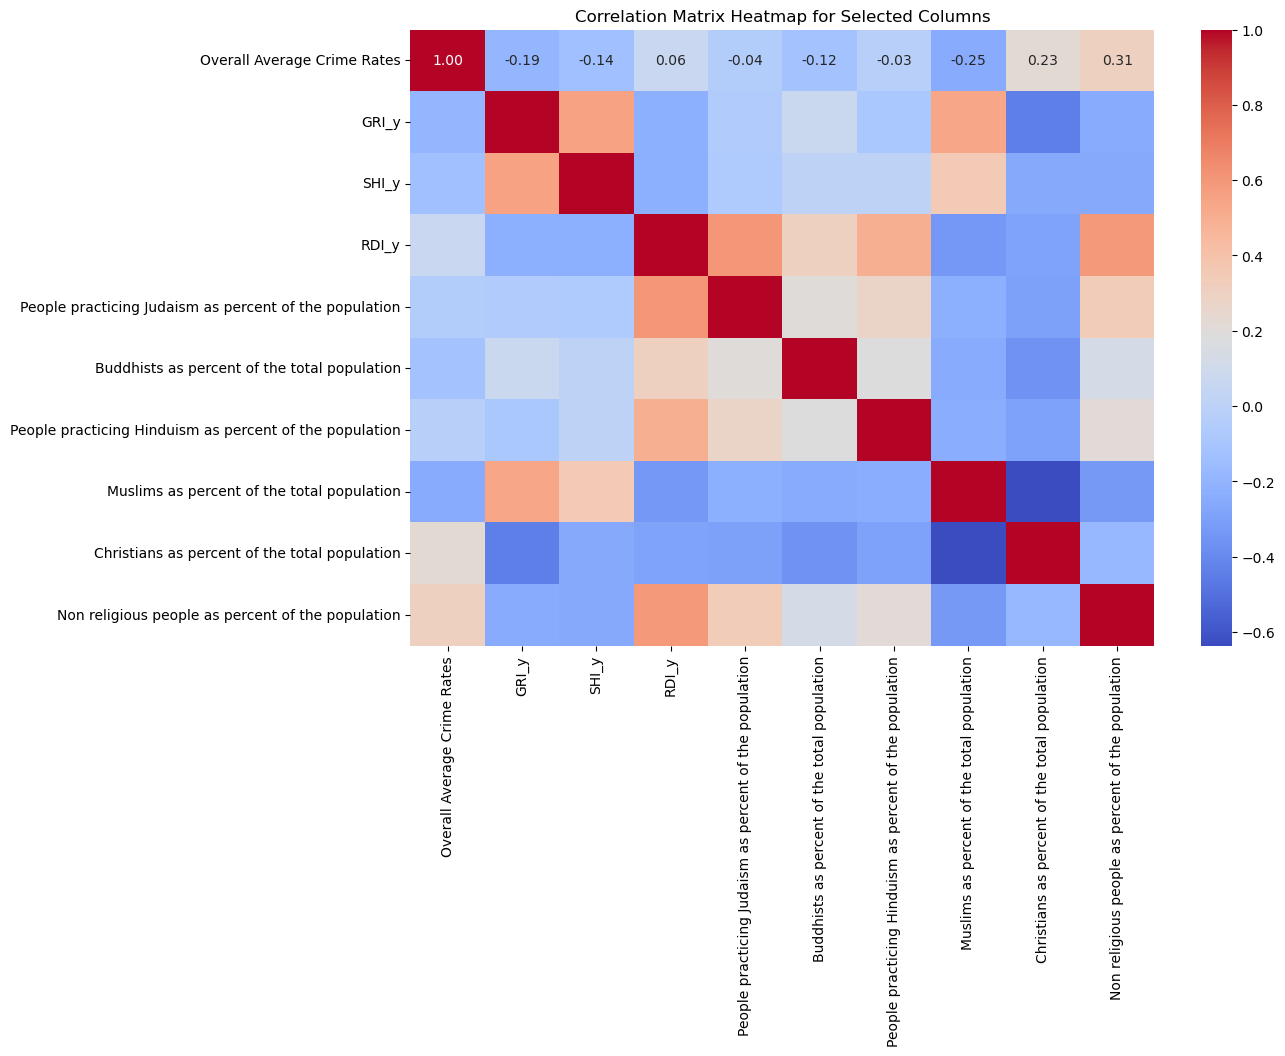

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correct list of columns to include in the correlation plot
columns_of_interest = [
    'Overall Average Crime Rates', 'GRI_y', 'SHI_y', 'RDI_y',
    'People practicing Judaism as percent of the population',
    'Buddhists as percent of the total population',
    'People practicing Hinduism as percent of the population',
    'Muslims as percent of the total population',
    'Christians as percent of the total population',
    'Non religious people as percent of the population'
]

# Filter the dataframe to include only the columns of interest
filtered_data = merged_df_years[columns_of_interest]

# Compute the correlation matrix for the selected columns
correlation_matrix_filtered = filtered_data.corr()

# Create a heatmap for the selected correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap for Selected Columns')
plt.show()